# CO₂ Emissions Prediction from Vehicle Data

## Project Overview
The primary objective of this project is to build a machine learning model that predicts a car's CO₂ emissions (in g/km) based on its key specifications. I used a linear regression model to explore the relationships between features like engine size, cylinders, and fuel consumption, and the target variable, CO₂ emissions.

---

## Data Description
The dataset, sourced from the Canadian government, contains information on vehicle models and their emissions ratings. It includes both numerical and categorical features that describe a vehicle's mechanical and fuel-related properties. The key columns we will focus on are:

- **Engine_Size_L**: The size of the engine in liters.

- **Cylinders**: The number of cylinders in the engine.

- **Fuel_Consumption_Comb_L_100km**: Fuel consumption in liters per 100 km (combined city and highway).

- **CO2_Emissions_g_km**: The target variable representing CO₂ emissions in grams per kilometer.

---

## Methodology
My approach will follow a standard machine learning workflow:

1. **Data Loading and Initial Exploration**: Load the dataset and perform an initial check of its structure, data types, and summary statistics.

2. **Data Cleaning**: Standardize column names to a consistent format for easier access and readability.

3. **Exploratory Data Analysis (EDA)**: Visualize the relationships between features and the target variable to gain insights into the data.

4. **Feature and Target Selection**: Separate the dataset into feature and target variables.

5. **Model Training**: Train a linear regression model using a scikit-learn pipeline, which includes data scaling to ensure features are on the same magnitude.

6. **Model Evaluation**: Assess the model's performance using key regression metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) score.


In [46]:
!pip install pandas numpy scikit-learn seaborn matplotlib

## Import Libraries and load the dataset

In [47]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("C:/Users/USER/Documents/ML Projects/co2-emmissions-lr/data/CO2 Emissions_Canada.csv")

# Display first rows, dataset shape, and info for a quick overview
df.head(), df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

(    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
 0  ACURA         ILX       COMPACT             2.0          4          AS5   
 1  ACURA         ILX       COMPACT             2.4          4           M6   
 2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
 3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
 4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   
 
   Fuel Type  Fuel Consumption City (L/100 km)  \
 0         Z                               9.9   
 1         Z                              11.2   
 2         Z                               6.0   
 3         Z                              12.7   
 4         Z                              12.1   
 
    Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
 0                              6.7                               8.5   
 1                              7.7                               9.6   
 2 

## Rename columns

In [48]:
# Check column names in the dataset
print(df.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [49]:
# Rename columns for consistency and easier access
# Using snake_case to make column names Python-friendly
new_names_list = ['Make', 'Model', 'Vehicle_Class', 'Engine_Size_L', 'Cylinders', 
                   'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_L_100km',
                   'Fuel_Consumption_Hwy_L_100km', 'Fuel_Consumption_Comb_L_100km',
                   'Fuel_Consumption_Comb_mpg', 'CO2_Emissions_g_km']
df.columns = new_names_list
print(df.columns)

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size_L', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_L_100km',
       'Fuel_Consumption_Hwy_L_100km', 'Fuel_Consumption_Comb_L_100km',
       'Fuel_Consumption_Comb_mpg', 'CO2_Emissions_g_km'],
      dtype='object')


In [50]:
df.describe()

,Engine_Size_L,Cylinders,Fuel_Consumption_City_L_100km,Fuel_Consumption_Hwy_L_100km,Fuel_Consumption_Comb_L_100km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## Created a subset of the dataset including only relevant columns

In [51]:
selected_columns = ['Engine_Size_L', 'Cylinders', 'Fuel_Consumption_City_L_100km', 'Fuel_Consumption_Hwy_L_100km',	
                    'Fuel_Consumption_Comb_L_100km', 'Fuel_Consumption_Comb_mpg',	'CO2_Emissions_g_km']
df_subset = df[selected_columns]
df_subset.head()

,Engine_Size_L,Cylinders,Fuel_Consumption_City_L_100km,Fuel_Consumption_Hwy_L_100km,Fuel_Consumption_Comb_L_100km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


## Exploratory Data Analysis (EDA)

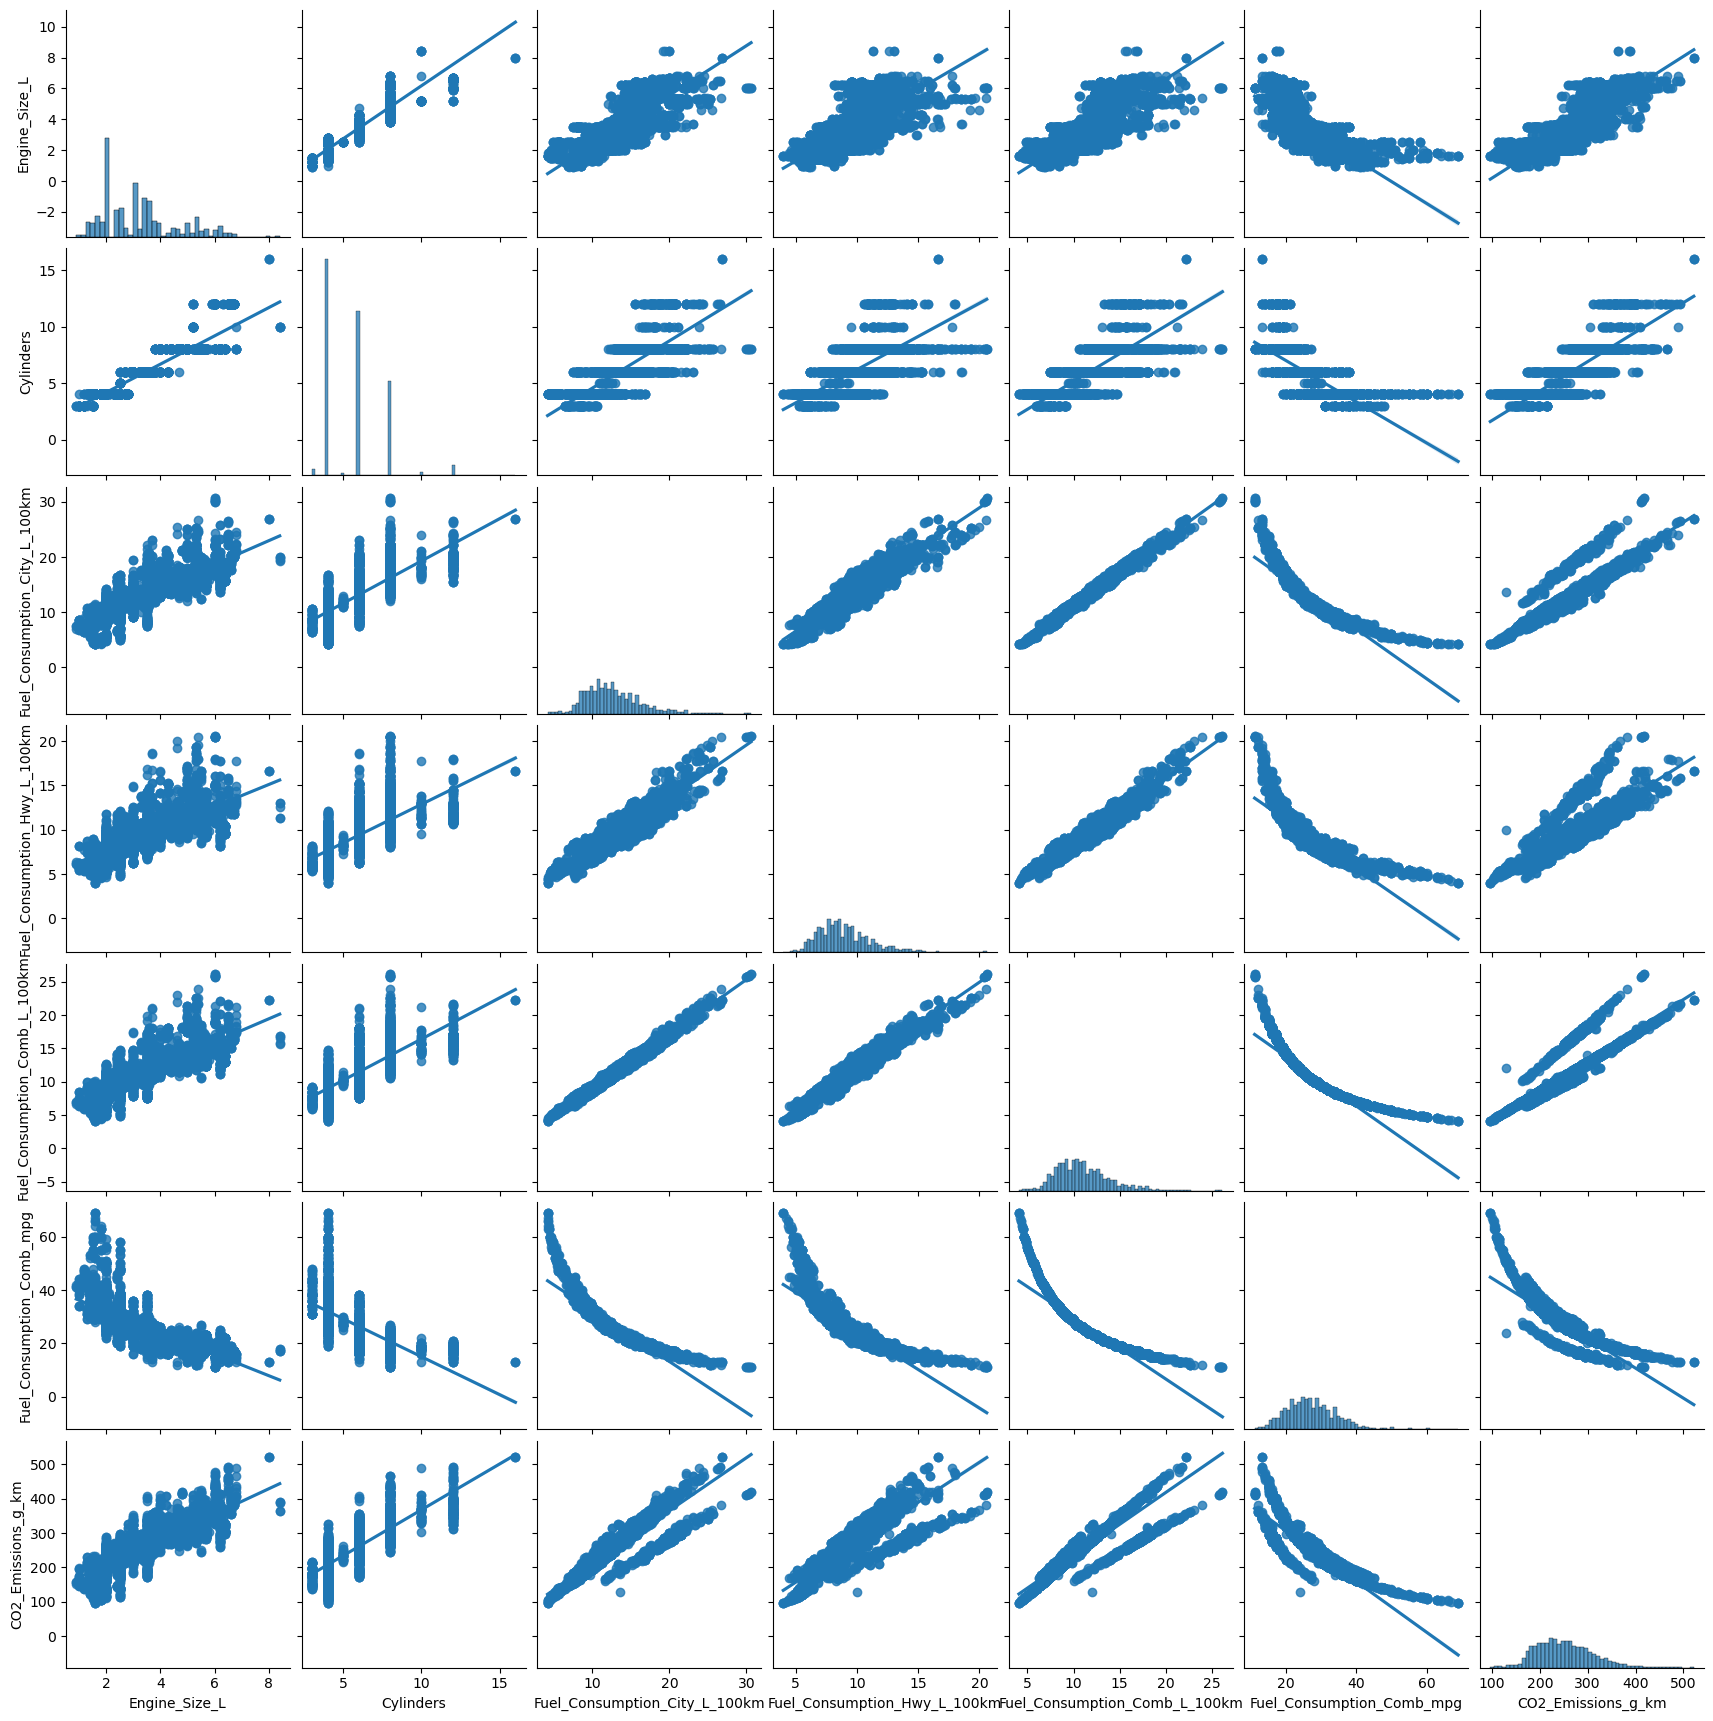

In [52]:
import seaborn as sns

# Create a pairplot to visualize the relationships between all selected numerical variables.
sns.pairplot(df_subset, kind='reg')
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')

## Model Training

In [53]:
# Import necessary modules from scikit-learn
from sklearn.model_selection import train_test_split

# Define feature set (X) and target (y)
target = 'CO2_Emissions_g_km'
features = ['Engine_Size_L',	'Fuel_Consumption_City_L_100km',
            'Fuel_Consumption_Hwy_L_100km',	'Fuel_Consumption_Comb_L_100km']

X = df[features]
y = df[target]

In [54]:
# Split the data into training and testing sets.
# The model will be trained on the training data and evaluated on the unseen test data.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state=42 ensures the split is reproducible.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [55]:
# Build a pipeline to streamline the workflow.
# A Pipeline sequentially applies a list of transformers and a final estimator.
# In this case, it first scales the data and then trains the linear regression model.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocessor = StandardScaler()
model = Pipeline([
    ("scaler", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [56]:
# Fit the pipeline to the training data.
# This step automatically performs the scaling on X_train and then trains the model.

y_pred = model.predict(X_test)

In [57]:
# Calculate and print the model's performance metrics.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Square Error: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Mean Absolute Error: 13.52
Mean Square Error: 21.03
R²: 0.87


In [58]:
# Extract coefficients to understand feature importance.

regressor = model.named_steps["regressor"]
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": regressor.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coefficients)

                         Feature  Coefficient
3  Fuel_Consumption_Comb_L_100km    29.687430
0                  Engine_Size_L    17.351017
1  Fuel_Consumption_City_L_100km     8.768462
2   Fuel_Consumption_Hwy_L_100km     1.148602


## 📊 Visualizing Linear Regression Results

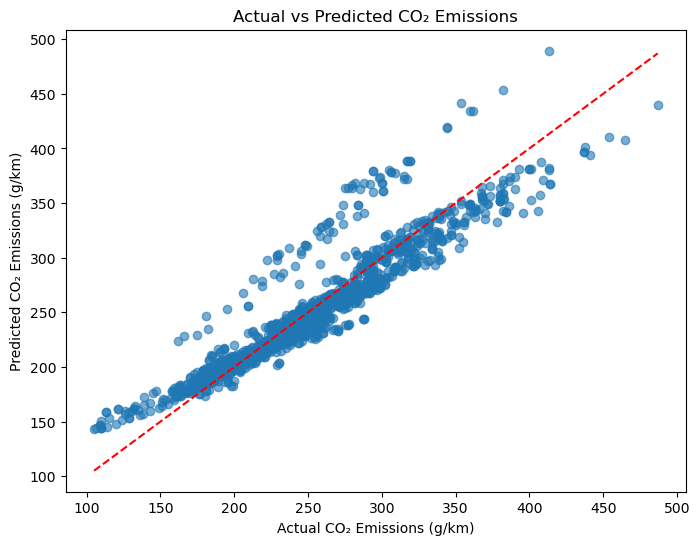

In [62]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted CO₂ emissions
# The chart illustrates how close predictions are to actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual CO₂ Emissions (g/km)")
plt.ylabel("Predicted CO₂ Emissions (g/km)")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.savefig('actual_vs_predicted_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()


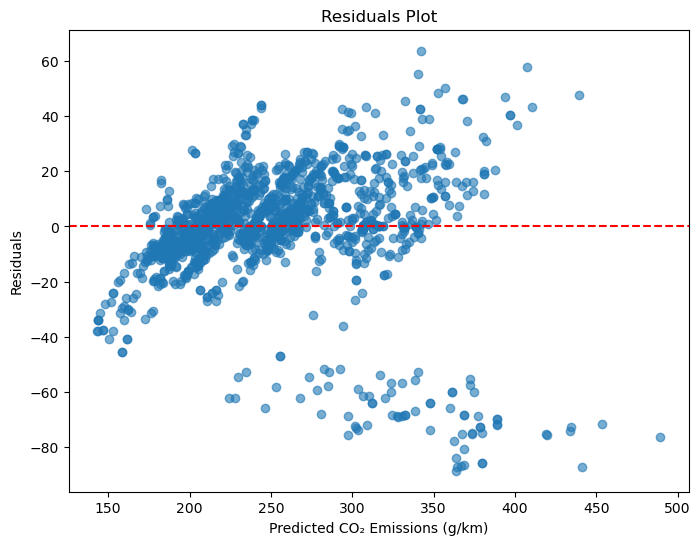

In [63]:
# Create a residual plot to detect bias.
# A good model will have residuals scattered randomly with no clear pattern
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted CO₂ Emissions (g/km)")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.savefig('residuals_plot.png', dpi=300, bbox_inches='tight')
plt.show()


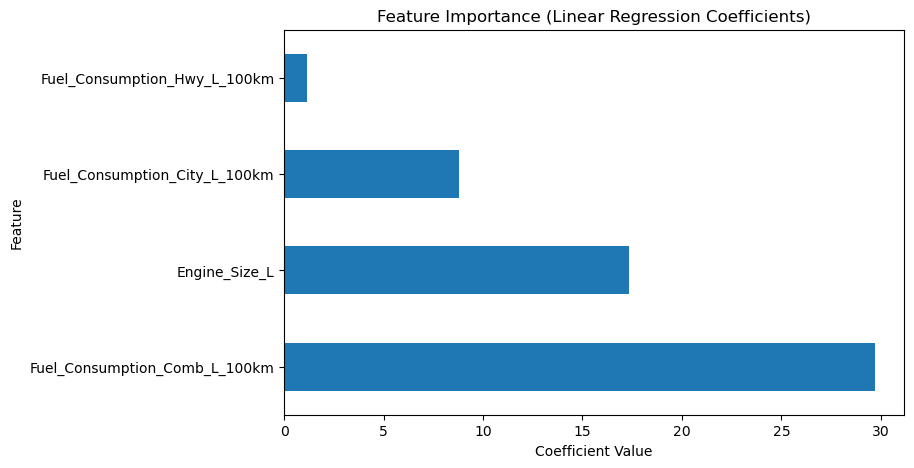

In [64]:
coefficients.plot(kind="barh", x="Feature", y="Coefficient", legend=False, figsize=(8,5))
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.savefig('coefficients_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()
